In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function import Polynomial, Fourier
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

In [16]:
x_train, x_valid, y_train, y_valid = get_siso_data(
    n=1000,
    colored_noise=False,
    sigma=0.001,
    train_percentage=90)

In [17]:
basis_function = Polynomial(degree=2)
model = FROLS(
    basis_function = basis_function,
    order_selection = True,
    n_info_values = 10,
    extended_least_squares = False,
    ylag = 2, 
    xlag = 2,
    info_criteria = 'aic',
    estimator = 'least_squares',
)

In [18]:
model.fit(X=x_train, y=y_train)

In [19]:
yhat = model.predict(X=x_valid, y=y_valid)

In [20]:
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

0.0018239288383653032


In [21]:
r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)

       Regressors   Parameters             ERR
0         x1(k-2)   9.0005E-01  9.55245507E-01
1          y(k-1)   2.0006E-01  4.13865354E-02
2   x1(k-1)y(k-1)   1.0024E-01  3.36423994E-03
3          y(k-2)  -1.3189E-04  1.65994395E-08
4  x1(k-2)x1(k-1)  -2.0258E-04  1.40142174E-08
5         x1(k-1)   1.0557E-04  1.32368006E-08


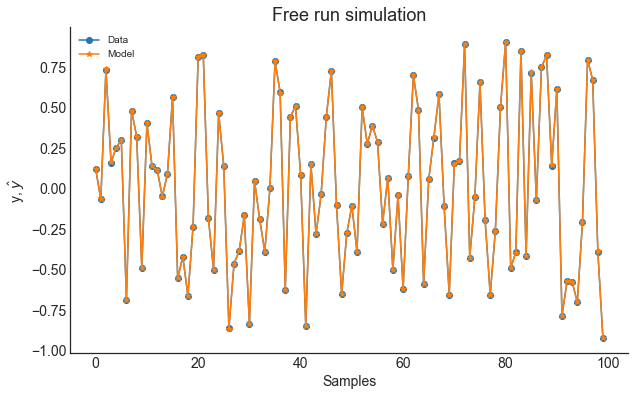

In [23]:
plot_results(y=y_valid, yhat = yhat, n=1000)

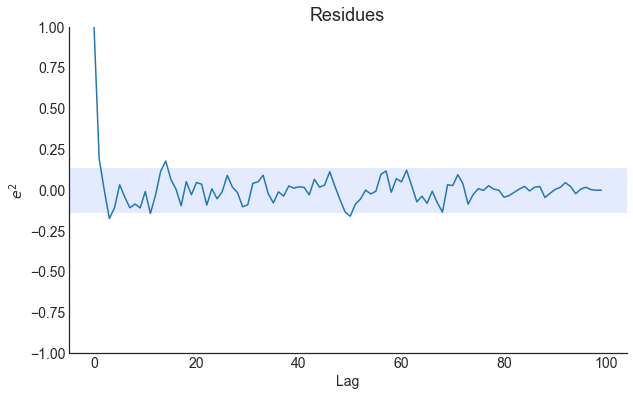

In [28]:
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")

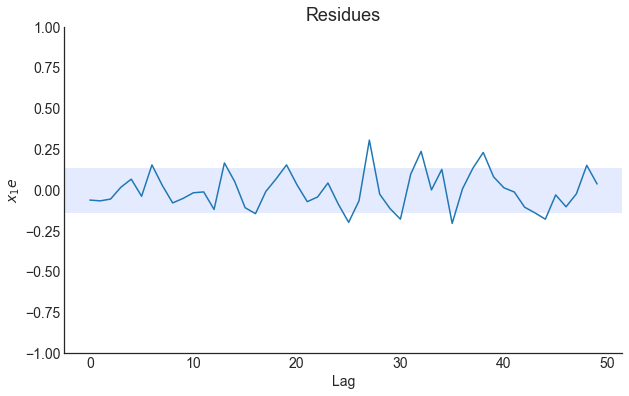

In [27]:
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")